In [1]:
# This notebook takes the input dataset, finds quartiles for the medical interventions (IV in, max vaso in)
# for each block.
# We then discretise actions in the original dataset according to what bin they fall in, and then save 
# a new dataframe with the discretised actions.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from pandas import DataFrame

In [5]:
orig_data = pd.read_csv("C:\\Users\\sara1\\Desktop\\Workingdata\\Final1.csv", low_memory=False)

In [6]:
orig_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,wbc,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp
0,34712382,7,3,91,51.0,F,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
1,34712382,7,3,91,51.0,F,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
2,34712382,7,3,91,51.0,F,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
3,34712382,7,3,91,51.0,F,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
4,30902754,2,4,87,80.0,M,8,1,2.879823,36.0,...,13.2,2.895128,0.5,120.0,36.980675,97.0,2.406079,39.058680,30.0,1


In [7]:
# Define a dictionary to map gender strings to numerical representation
gender_map = {'F': 0, 'M': 1}

# Replace gender values using the dictionary mapping
orig_data['gender'] = orig_data['gender'].replace(gender_map)

In [8]:
orig_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,wbc,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp
0,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
1,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
2,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
3,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
4,30902754,2,4,87,80.0,1,8,1,2.879823,36.0,...,13.2,2.895128,0.5,120.0,36.980675,97.0,2.406079,39.058680,30.0,1


In [ ]:
# # Add an END state to each trajectory. This takes some time, so comment out if already done!
orig_data['END'] = False
new_df = pd.DataFrame(columns=orig_data.columns)
new_idx = 0
for i in orig_data.index:
    if i == 0:
        new_df.loc[new_idx, orig_data.columns] = orig_data.loc[i,:]
        new_idx +=1
        continue
    if orig_data.loc[i, 'stay_id'] != orig_data.loc[i-1, 'stay_id']:
        # new patient; add an end state to the new_df
        new_df.loc[new_idx, orig_data.columns] = np.nan
        new_df.loc[new_idx, 'stay_id'] = new_df.loc[new_idx-1, 'stay_id']
        new_df.loc[new_idx, 'END'] = True
        new_idx += 1
        new_df.loc[new_idx, orig_data.columns] = orig_data.loc[i,:]
        new_idx += 1
    else:
        new_df.loc[new_idx, orig_data.columns] = orig_data.loc[i,:]
        new_idx += 1
    if i % 1000 == 0:
        print (i)

orig_data = new_df

In [9]:
# Create a boolean mask to identify rows where stay_id changes
mask = orig_data['stay_id'].ne(orig_data['stay_id'].shift())

# Create a list of dictionaries to represent rows of new_df
rows = []
for i in orig_data.index:
    if i == 0 or mask[i]:
        # For first row or when stay_id changes, add a new row with END state
        row = orig_data.loc[i, :].to_dict()
        row['END'] = True
        rows.append(row)
    row = orig_data.loc[i, :].to_dict()
    row['END'] = False
    rows.append(row)

# Create new_df from the list of dictionaries
new_df = pd.DataFrame(rows)

In [10]:
new_df.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,END
0,34712382.0,7.0,3.0,91.0,51.0,0.0,14.0,7.0,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.4,14.799999,0.0,0.0,True
1,34712382.0,7.0,3.0,91.0,51.0,0.0,14.0,7.0,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.4,14.799999,0.0,0.0,False
2,34712382.0,7.0,3.0,91.0,51.0,0.0,14.0,7.0,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.4,14.799999,0.0,0.0,False
3,34712382.0,7.0,3.0,91.0,51.0,0.0,14.0,7.0,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.4,14.799999,0.0,1.0,False
4,34712382.0,7.0,3.0,91.0,51.0,0.0,14.0,7.0,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.4,14.799999,0.0,1.0,False


In [11]:
new_df.shape

(6041664, 31)

In [12]:
orig_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,wbc,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp
0,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
1,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0
2,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
3,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,1.7,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1
4,30902754,2,4,87,80.0,1,8,1,2.879823,36.0,...,13.2,2.895128,0.5,120.0,36.980675,97.0,2.406079,39.058680,30.0,1


In [13]:
orig_data.shape

(6038365, 30)

In [14]:
orig_data.to_csv("C:\\Users\\sara1\\Desktop\\Workingdata\\Final2.csv", index=False)

In [15]:
# assume we're using vaso_amount as the input params for now
interventions = orig_data[["vaso_amount"]]

In [16]:
interventions.head()

,vaso_amount
0,14.799999
1,14.799999
2,14.799999
3,14.799999
4,39.058680


In [17]:
adjusted_vaso = interventions["vaso_amount"][interventions["vaso_amount"] >0]

In [18]:
vaso_quartiles = adjusted_vaso.quantile([0.25,0.50,0.75])

In [19]:
vq = np.array(vaso_quartiles)
vq

array([ 3.6 , 18.48, 38.6 ])

In [21]:
# so, for vasopressors:
# 0 = input_0
# 0 < vaso < 3.6 = input_1
# 3.6 <= vaso < 18.48 = input_2
# 18.48 <= vaso < 38.6 = input_3
# 38.6 <= input_4

In [20]:
import copy
discretised_int = copy.deepcopy(interventions)

In [22]:
discretised_int['vaso_input'] = discretised_int['vaso_amount']
discretised_int['vaso_input'][interventions['vaso_amount'] == 0.0] = 0
discretised_int['vaso_input'][(interventions['vaso_amount'] > 0.0) & (interventions['vaso_amount'] < vq[0])] = 1
discretised_int['vaso_input'][(interventions['vaso_amount'] >= vq[0]) & (interventions['vaso_amount'] < vq[1])] = 2
discretised_int['vaso_input'][(interventions['vaso_amount'] >= vq[1]) & (interventions['vaso_amount'] < vq[2])] = 3
a = interventions['vaso_amount'] >= vq[2]
discretised_int['vaso_input'][a] = 4

<AxesSubplot:ylabel='Frequency'>

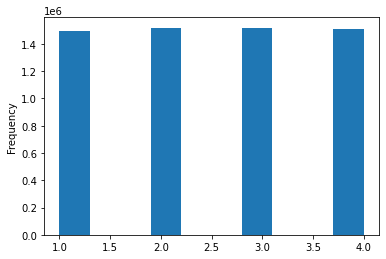

In [23]:
discretised_int['vaso_input'].plot.hist()

In [24]:
disc_inp_data = copy.deepcopy(orig_data)

In [25]:
disc_inp_data['vaso_input'] = discretised_int['vaso_input']

In [26]:
disc_inp_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input
0,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0,2.0
1,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0,2.0
2,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1,2.0
3,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1,2.0
4,30902754,2,4,87,80.0,1,8,1,2.879823,36.0,...,2.895128,0.5,120.0,36.980675,97.0,2.406079,39.058680,30.0,1,4.0


In [27]:
disc_inp_data['vaso_input'].value_counts()

2.0    1517946
3.0    1516933
4.0    1509635
1.0    1493851
Name: vaso_input, dtype: int64

In [28]:
disc_inp_data.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\discretised_input_data.csv', index=False)